In [95]:

import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import operator
from dateutil.parser import parse

# Features Description

This dataset contains 75 features about Airbnb listings within Singapore. This notebook encompasses the cleaning & exploration <br>data analysis (EDA) of the first 25 features.
Below are the features with their respective descriptions</br>

1.  id: The unique identifier for each Airbnb listing.
2.  listing_url: The URL of the Airbnb listing.
3.  scrape_id: The unique identifier for the data scraping process.
4.  last_scraped: The date when the data was last scraped.
5.  source: The source of the data.
6.  name: The name or title of the Airbnb listing.
7.  description: The description of the Airbnb listing.
8.  neighborhood_overview: A brief overview of the neighborhood where the Airbnb listing is located.
9.  picture_url: The URL of the primary picture of the Airbnb listing.
10.  host_id: The unique identifier for the host of the Airbnb listing.
11.  host_url: The URL of the host's profile.
12.  host_name: The name of the host of the Airbnb listing.
13.  host_since: The date when the host joined Airbnb.
14.  host_location: The location of the host.
15.  host_about: A brief description of the host.
16.  host_response_time: The average response time of the host to messages.
17.  host_response_rate: The percentage of messages that the host responds to.
18.  host_acceptance_rate: The percentage of reservation requests that the host accepts.
19.  host_is_superhost: A binary variable indicating if the host is a superhost.
20.  host_thumbnail_url: The URL of the host's profile picture.
21.  host_picture_url: The URL of the host's profile picture.
22.  host_neighbourhood: The neighborhood where the host is located.
23.  host_listings_count: The number of listings that the host has.
24.  host_total_listings_count: The total number of listings that the host has, including inactive listings.
25.  host_verifications: A list of verification methods that the host has completed.
26.  host_has_profile_pic: A binary variable indicating if the host has a profile picture.

### J'sen Ong EDA

In [96]:
airDF = pd.read_csv("listings.csv")
airDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,71609.0,https://www.airbnb.com/rooms/71609,2.022120e+13,12/29/2022,city scrape,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,4.78,4.26,4.32,NaN,f,6,0,6,0,0.15
1,71896.0,https://www.airbnb.com/rooms/71896,2.022120e+13,12/29/2022,city scrape,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,4.43,4.17,4.04,NaN,t,6,0,6,0,0.17
2,71903.0,https://www.airbnb.com/rooms/71903,2.022120e+13,12/29/2022,city scrape,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,4.64,4.50,4.36,NaN,f,6,0,6,0,0.33
3,275343.0,https://www.airbnb.com/rooms/275343,2.022120e+13,12/29/2022,city scrape,Amazing Room with window 10min to Redhill,Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.42,4.53,4.63,S0399,f,46,2,44,0,0.19
4,275344.0,https://www.airbnb.com/rooms/275344,2.022120e+13,12/29/2022,city scrape,15 mins to Outram MRT Single Room,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.54,4.62,4.46,S0399,f,46,2,44,0,0.11


In [97]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3035 non-null   float64
 1   listing_url                                   3035 non-null   object 
 2   scrape_id                                     3035 non-null   float64
 3   last_scraped                                  3035 non-null   object 
 4   source                                        3035 non-null   object 
 5   name                                          3035 non-null   object 
 6   description                                   2985 non-null   object 
 7   neighborhood_overview                         1973 non-null   object 
 8   picture_url                                   3035 non-null   object 
 9   host_id                                       3035 non-null   i

## Visual data cleaning 

### In the context of maximizing host profit, the following features can be dropped from the dataset :

1. **id listing_url** 
2. **scrape_id** and **lastscraped** 
3. **source** 
4. **name**
5. **picture url**
6. **host id** and **host url** 
7. **host name** 
8. **host since** 
9. **host about** 
10. **host thumbnail** and **host picture** 
11. **host_thumbnail_url** and **host_picture_url** 
12. **host_listing_count** and **host_total_listing_count**

### Below are features that we have deemed informative for analyzing factors that impact host profit :

1. **Description** : The description should highlight the unique features and amenities of the listing which can help to attract more potential guests and increase bookings, thereby impacting host profit.

2. **Neighborhood overview** : Similar to Description, neighborhood surrounding can be an important factor for guests.

3. **Host location** : host's living location can impact their profit on Airbnb in certain ways, we will perform EDA on this to verify the authenticity of it

4. **Host response time** : Hosts with faster response times may be more likely to secure bookings and receive positive reviews, which can impact host profit.

5. **Host response rate** : Similar to Host response time , hosts with higher response rates may be more likely to secure bookings and receive positive reviews, which can impact host profit.

6. **Host acceptance rate** : The percentage of guest requests that a host accepts can impact booking rates and guest satisfaction. Hosts with higher acceptance rates may be more likely to secure bookings and receive positive reviews, which can impact host profit.

7. **Host is superhost**  The "superhost" designation on Airbnb is given to experienced and highly-rated hosts. This can be an important factor in attracting guests and increasing booking rates, which can impact host profit.

8. **Host neighborhood** :  Listings in desirable or central locations may be more likely to attract guests and can therefore potentially increase their profit. 

## 1. EDA on Description


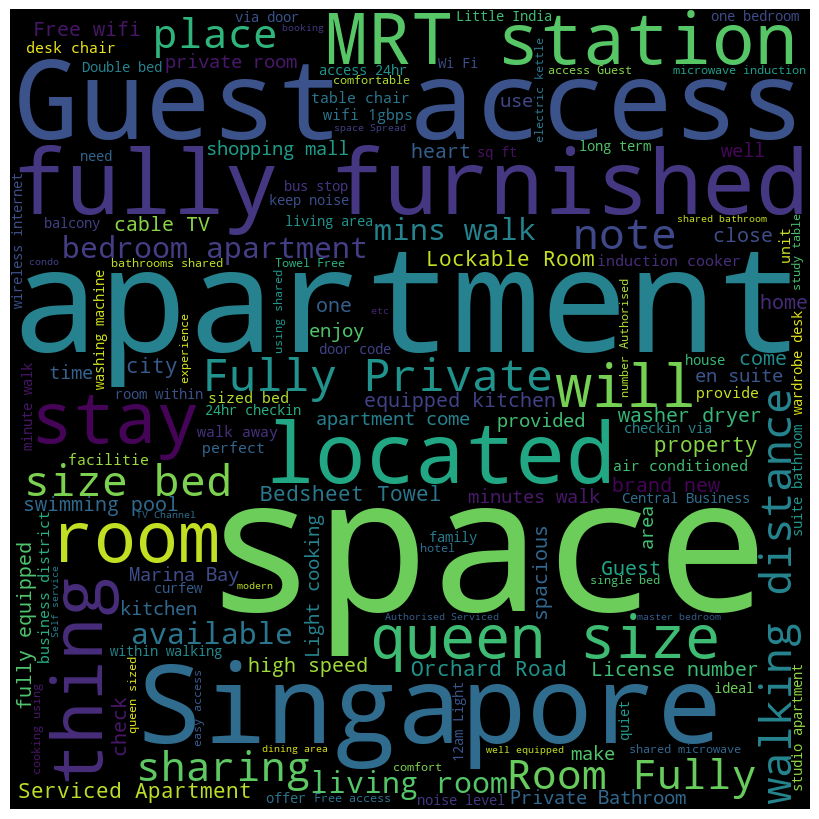

In [98]:
description_df = airDF["description"].copy()
descriptionText = " ".join(description_df.astype(str))

breaks = ["<b>","</b>","<b/>","<br />","<br>"]

for x in breaks:    
    descriptionText = descriptionText.replace(x, " ")

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      min_font_size=10).generate(descriptionText)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## 2. EDA on Neighborhood_overview

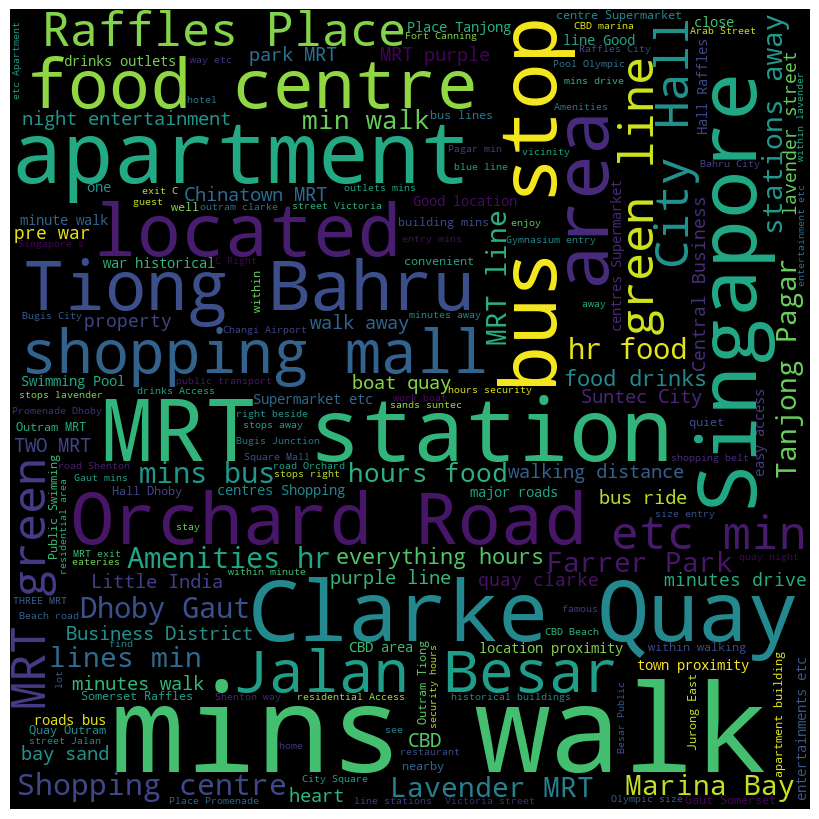

In [99]:
neighborhoodOverview_df = airDF["neighborhood_overview"].copy()
neighborhoodText = " ".join(neighborhoodOverview_df.astype(str))

breaks = ["<b>","</b>","<b/>","<br />","<br>", "nan"]

for x in breaks:    
    neighborhoodText = neighborhoodText.replace(x, " ")


wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      min_font_size=10).generate(neighborhoodText)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 3. EDA on host_location

In [100]:
locationdata = airDF["host_location"].copy()
locationdata = locationdata.dropna()
locationdata.value_counts()


Singapore                           1832
Uttar Pradesh, India                 106
Jakarta, Indonesia                    30
Amsterdam, Netherlands                10
France                                 6
Hong Kong                              5
China                                  5
Paris, France                          4
Berlin, Germany                        2
Lower Broadheath, United Kingdom       2
San Francisco, CA                      2
Las Piñas, Philippines                 2
Agadir, Morocco                        2
New York, NY                           2
Camperdown, Australia                  1
Malaysia                               1
Melbourne, Australia                   1
Honolulu, HI                           1
Vancouver, Canada                      1
Frisco, TX                             1
Falcon, Australia                      1
Bangkok, Thailand                      1
Madrid, Spain                          1
Gianyar, Indonesia                     1
Shanghai, China 

In [101]:
numberOfEntries = locationdata.count()
SingaporeCount = operator.countOf(locationdata,"Singapore")

percentage = (SingaporeCount /numberOfEntries)
formatted_percentage = "{:.2f}%".format(percentage * 100)
print("{} of the hosts are from Singapore".format(formatted_percentage))

90.02% of the hosts are from Singapore


#### We will not be using host location as a predictor of profit because the dataset for host_location is highly imbalanced with 90.02% of the data occupied by "singapore"

### 4. EDA on host_response_time vs number of_reviews

In [102]:
responsetimereviews_df = airDF[["host_response_time","number_of_reviews"]]
responsetimereviews_df = responsetimereviews_df.dropna(how = "any")
responsetimereviews_df.describe()
        

,number_of_reviews
count,2418.000000
mean,10.301902
std,30.403844
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,369.000000


In [103]:
# group the data by host_response_time and calculate the mean for number_of_reviews
mean_reviews_by_response_time = responsetimereviews_df.groupby('host_response_time')['number_of_reviews'].mean()

# print the results
print("Mean number of reviews by host response time:")
print(mean_reviews_by_response_time)

Mean number of reviews by host response time:
host_response_time
a few days or more     7.365000
within a day           9.016129
within a few hours     8.063241
within an hour        13.635960
Name: number_of_reviews, dtype: float64


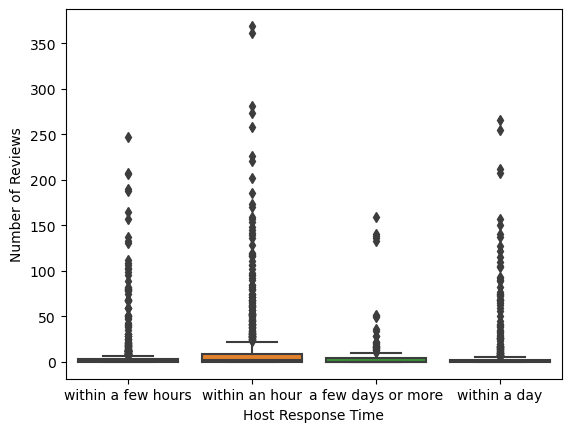

In [104]:
# create a box plot
sb.boxplot(x='host_response_time', y='number_of_reviews', data=responsetimereviews_df)
plt.xlabel('Host Response Time')
plt.ylabel('Number of Reviews')
plt.show()

### 5. EDA on host_is_superhost

In [110]:
superHost_df = airDF["host_is_superhost"].copy()
superHost_df.describe()

count     3034
unique       2
top          f
freq      2811
Name: host_is_superhost, dtype: object

In [112]:
superHost_df.value_counts()

f    2811
t     223
Name: host_is_superhost, dtype: int64

#### We will not be using host is superhost as a predictor of profit because the dataset for host_is_superhost is highly imbalanced with 2811 : 223

### 6. EDA on neighborhood

In [133]:
neighborhood_df = airDF["neighbourhood_cleansed"].copy()
neighborhood_df.value_counts()


Kallang                    353
Downtown Core              325
Outram                     255
Rochor                     214
Novena                     182
Queenstown                 176
Bukit Merah                163
River Valley               157
Geylang                    145
Bedok                      120
Singapore River             98
Tanglin                     86
Orchard                     67
Clementi                    59
Jurong East                 57
Newton                      55
Marine Parade               47
Jurong West                 43
Bukit Timah                 39
Toa Payoh                   37
Bishan                      33
Hougang                     32
Serangoon                   32
Woodlands                   31
Sembawang                   28
Bukit Batok                 24
Tampines                    23
Southern Islands            21
Pasir Ris                   20
Ang Mo Kio                  16
Yishun                      16
Bukit Panjang               15
Museum  

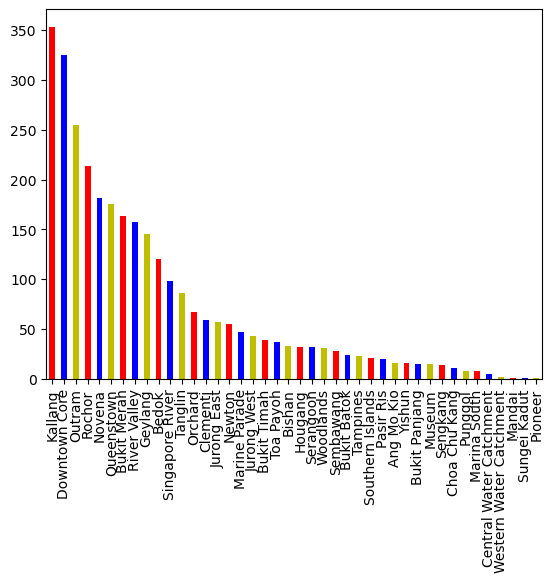

<Figure size 4000x1500 with 0 Axes>

In [121]:
neighborhood_df.value_counts().plot(kind='bar',color=['r','b','y'])
plt.figure(figsize = (40,15))
plt.show()